In [30]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
I, N, T = [], [], []
with open("./data.csv", 'r') as file:
  csvreader = csv.DictReader(file, delimiter=',')
  for row in csvreader:
    print(row)
    I.append(float(row['I']))
    N.append(float(row['N']))
    T.append(float(row['t']))

{'I': '0.2', 'N': '114', 't': '100'}
{'I': '0.4', 'N': '136', 't': '100'}
{'I': '0.6', 'N': '150', 't': '100'}
{'I': '0.7999999999999999', 'N': '273', 't': '100'}
{'I': '0.9999999999999999', 'N': '556', 't': '100'}
{'I': '1.1999999999999997', 'N': '929', 't': '100'}
{'I': '1.3999999999999997', 'N': '1189', 't': '100'}
{'I': '1.5999999999999996', 'N': '1394', 't': '100'}
{'I': '1.7999999999999996', 'N': '1489', 't': '100'}
{'I': '1.9999999999999996', 'N': '1496', 't': '100'}
{'I': '2.1999999999999993', 'N': '1449', 't': '100'}
{'I': '2.3999999999999995', 'N': '1089', 't': '100'}
{'I': '2.5999999999999996', 'N': '792', 't': '100'}
{'I': '2.7999999999999994', 'N': '396', 't': '100'}
{'I': '2.999999999999999', 'N': '422', 't': '100'}
{'I': '3.1', 'N': '1276', 't': '100'}
{'I': '3.15', 'N': '1935', 't': '100'}
{'I': '3.1999999999999993', 'N': '2279', 't': '100'}
{'I': '3.25', 'N': '2447', 't': '100'}
{'I': '3.3', 'N': '2229', 't': '100'}
{'I': '3.35', 'N': '1759', 't': '100'}
{'I': '3.39999

In [3]:
print(I)

[0.2, 0.4, 0.6, 0.7999999999999999, 0.9999999999999999, 1.1999999999999997, 1.3999999999999997, 1.5999999999999996, 1.7999999999999996, 1.9999999999999996, 2.1999999999999993, 2.3999999999999995, 2.5999999999999996, 2.7999999999999994, 2.999999999999999, 3.1, 3.15, 3.1999999999999993, 3.25, 3.3, 3.35, 3.3999999999999995, 3.5, 3.599999999999999, 3.78, 4.0, 4.2]


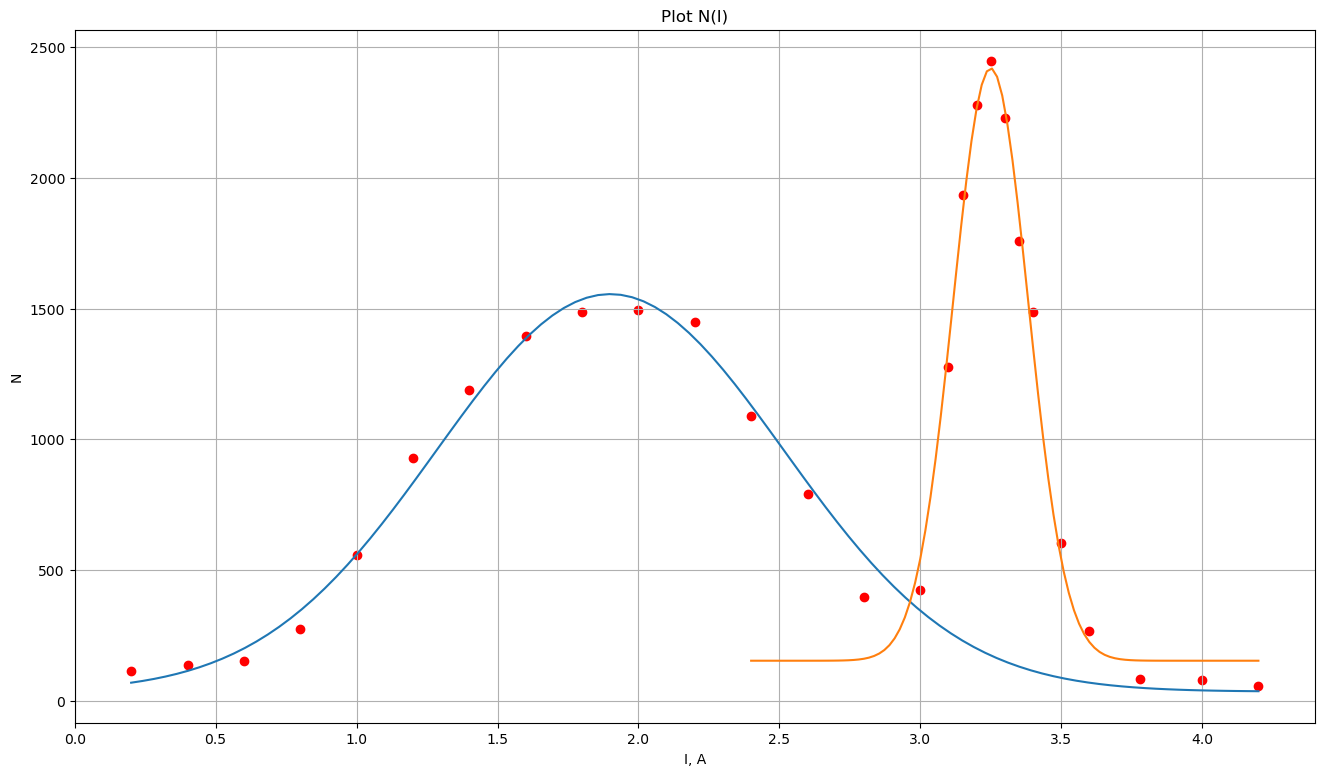

In [92]:
def gauss1(x, A, B, x0, H): 
    return H + A*np.exp(B*(x-1.9)**2)
    
X = np.linspace(I[0], I[-1], 100)
Params, Pcov = sp.optimize.curve_fit(gauss1, I[0:13], N[0:13])
Y = [gauss1(x, *Params) for x in X]
plt.figure(figsize=[16,9])
plt.plot(X, Y)

def gauss2(x, A, B, x0, H): 
    return H + A*np.exp(B*(x-3.25)**2)

Params, Pcov = sp.optimize.curve_fit(gauss2, I[13:], N[13:])
X = np.linspace(I[11], I[-1], 100)
Y = [gauss2(x, *Params) for x in X]
plt.plot(X, Y)

plt.scatter(I, N, color="red")
plt.title("Plot N(I)")
plt.xlabel("I, A")
plt.ylabel("N")
plt.grid()
plt.savefig("images/I-N.png")

In [ ]:
Nr = (np.sqrt(np.asarray(N))/T)/I
print(Nr)

In [ ]:
plt.figure(figsize=[16,9])
plt.plot(I, Nr)
plt.scatter(I, Nr, color="red")
plt.title("Plot Nr(I)")
plt.xlabel("I, A")
plt.ylabel("Nr")
plt.grid()

In [ ]:
IEff = I[5:15]
NrEff = Nr[5:15]
print (IEff)
print(NrEff)

In [ ]:
k, b = np.polyfit(IEff, NrEff, 1)
print (f"Nr = {k} * x + {b}")
X = np.linspace(I[0], I[-1], 100)
Y = [k*x + b for x in X]
ZeroIdx = -1
for i in range(len(Y)):
    if (abs(Y[i]) < 1e-3):
        ZeroIdx = i
        break
plt.figure(figsize=[16,9])
plt.plot(I, Nr)
plt.scatter(I, Nr, color="red")
plt.title(r"Plot $\frac{\sqrt{N/t}}{I}$")
plt.xlabel("I, A")
plt.ylabel(r"$\frac{\sqrt{N/t}}{I}$")
plt.grid()
plt.plot(X, Y, color="green")
plt.plot([X[ZeroIdx]], [Y[ZeroIdx]], "rx", markersize=15)
plt.savefig("images/I-Nr.png")
print (f"Intersects with y = 0 at x = {X[ZeroIdx]}, there Nr = {Nr[23]}")